In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import cumulative_trapezoid

In [2]:
plt.style.use('fivethirtyeight')

# Calculation of E(t) curve

Let's see how the number of CSTRs affect the E(t)-curve shape

In [3]:
def ECurve(theta, n):
    # theta : dimensionless residence time
    # n : numbers of ideal-CSTRS
    ecurve = ((n*(n*theta)**(n-1))/math.factorial(n-1))*np.exp(-n*theta) 
    return ecurve

In [4]:
reactors = [1, 2, 4, 10, 50] 
thetas = np.linspace(0.5, 1.5, 100)

Ecurves = [ECurve(thetas, reactor) for reactor in reactors]

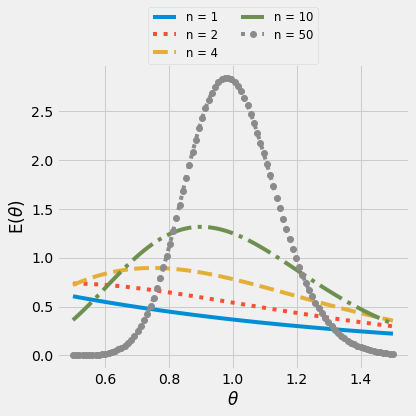

In [5]:
linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 
              'dotted']
markers = ['None', 'None', 'None', 'None', 'o']

fig, ax = plt.subplots(figsize=(6,6))

for i in range(len(reactors)):
    ax.plot(thetas, Ecurves[i],
            linestyle=linestyles[i],
            marker=markers[i],
            label=('n = %s' % reactors[i]))

ax.set_xlabel(r'$\theta$') 
ax.set_ylabel(r'E($\theta$)')
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', borderaxespad=0., fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

# Calculation of F(t) curve

In [6]:
F_curves = []
for ecurve in Ecurves:
    F_curves.append(cumulative_trapezoid(ecurve, thetas, initial=0))

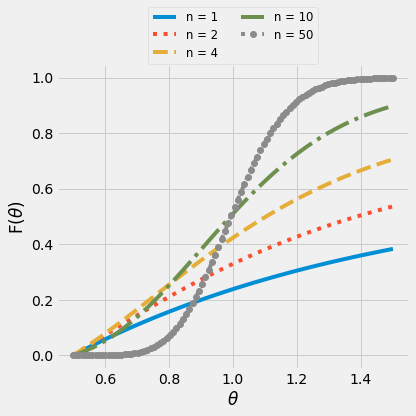

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

for i in range(len(reactors)):
    ax.plot(thetas, F_curves[i],
            linestyle=linestyles[i],
            marker=markers[i],
            label=('n = %s' % reactors[i]))

ax.set_xlabel(r'$\theta$') 
ax.set_ylabel(r'F($\theta$)')
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', borderaxespad=0., fontsize='small', ncol=2)
plt.tight_layout()
plt.show()